In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("zomato.csv")

In [3]:
data.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [4]:
data.shape

(51717, 17)

In [5]:
data.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [6]:
data.dtypes

url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [7]:
data.menu_item.values

array(['[]', '[]', '[]', ..., '[]', '[]', '[]'], dtype=object)

In [8]:
data.online_order.value_counts()

Yes    30444
No     21273
Name: online_order, dtype: int64

In [9]:
data.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [10]:
null_per=data.isnull().sum()/len(data)*100

In [11]:
null_per[null_per>30]

dish_liked    54.291626
dtype: float64

In [12]:
data.drop(['dish_liked'],axis=1,inplace=True)

In [13]:
data.shape

(51717, 16)

In [14]:
data.menu_item.nunique()

9098

In [15]:
#too many discrete values in menu_item. hence drop the column
data.drop(['menu_item'],axis=1,inplace=True)

In [16]:
data.nunique()

url                            51717
address                        11495
name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
cuisines                        2723
approx_cost(for two people)       70
reviews_list                   22513
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [17]:
#data with too many unique values can be dropped
data.drop(['url','address','reviews_list'],axis=1,inplace=True)

In [18]:
data.nunique()

name                            8792
online_order                       2
book_table                         2
rate                              64
votes                           2328
phone                          14926
location                          93
rest_type                         93
cuisines                        2723
approx_cost(for two people)       70
listed_in(type)                    7
listed_in(city)                   30
dtype: int64

In [19]:
data.phone.value_counts()

080 43334321                              216
080 43334333                              167
+91 7005889963                             78
+91 8197170008                             75
+91 7710055553                             58
                                         ... 
+91 9886699675\n080 43007077                1
+91 9740085513                              1
+91 9538944858                              1
+91 9663517066\r\r\r\r\n+91 9686861135      1
080 30571234\r\n080 30571540                1
Name: phone, Length: 14926, dtype: int64

In [20]:
#inconsistent format of data in phone number
data.drop(['phone'],axis=1,inplace=True)

In [21]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


In [22]:
data['listed_in(city)'].unique()

array(['Banashankari', 'Bannerghatta Road', 'Basavanagudi', 'Bellandur',
       'Brigade Road', 'Brookefield', 'BTM', 'Church Street',
       'Electronic City', 'Frazer Town', 'HSR', 'Indiranagar',
       'Jayanagar', 'JP Nagar', 'Kalyan Nagar', 'Kammanahalli',
       'Koramangala 4th Block', 'Koramangala 5th Block',
       'Koramangala 6th Block', 'Koramangala 7th Block', 'Lavelle Road',
       'Malleshwaram', 'Marathahalli', 'MG Road', 'New BEL Road',
       'Old Airport Road', 'Rajajinagar', 'Residency Road',
       'Sarjapur Road', 'Whitefield'], dtype=object)

In [23]:
data.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari


In [24]:
data['listed_in(type)'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

In [25]:
data['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [26]:
data.columns=['name','online_order','book_table','rate','votes','location','rest_type','cuisines','approx_cost','dining_type','Area']

In [27]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,dining_type,Area
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [28]:
data['rate']=data['rate'].str.strip("/5")

In [29]:
data[['rest_type1','rest_type2']]=data['rest_type'].str.split(",",n=1,expand=True)

In [30]:
data.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost,dining_type,Area,rest_type1,rest_type2
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,Casual Dining,None
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari,Casual Dining,None
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari,Cafe,Casual Dining
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari,Quick Bites,None
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari,Casual Dining,None


In [31]:
data.drop(['rest_type'],axis=1,inplace=True)

In [32]:
data.shape

(51717, 12)

In [33]:
data['approx_cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [34]:
data['approx_cost'].str.replace(',','')

0         800
1         800
2         800
3         300
4         600
         ... 
51712    1500
51713     600
51714    2000
51715    2500
51716    1500
Name: approx_cost, Length: 51717, dtype: object

In [35]:
data.head()

,name,online_order,book_table,rate,votes,location,cuisines,approx_cost,dining_type,Area,rest_type1,rest_type2
0,Jalsa,Yes,Yes,4.1,775,Banashankari,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari,Casual Dining,None
1,Spice Elephant,Yes,No,4.1,787,Banashankari,"Chinese, North Indian, Thai",800,Buffet,Banashankari,Casual Dining,None
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Mexican, Italian",800,Buffet,Banashankari,Cafe,Casual Dining
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,"South Indian, North Indian",300,Buffet,Banashankari,Quick Bites,None
4,Grand Village,No,No,3.8,166,Basavanagudi,"North Indian, Rajasthani",600,Buffet,Banashankari,Casual Dining,None


cuisine_less_count=pd.DataFrame(data=data[data.cuisines.value_counts()<1000])
cuisine_less_count

In [36]:
# filtering row-wise values that has cuisines less than 1000
cuisine_less_count=data['cuisines'].value_counts()[data['cuisines'].value_counts()<1000]
cuisine_less_count

Biryani                                                              918
Bakery, Desserts                                                     911
Fast Food                                                            803
Desserts                                                             766
Cafe                                                                 756
                                                                    ... 
South Indian, Fast Food, Chinese, North Indian                         1
Biryani, South Indian, Chinese, North Indian, Arabian, Hyderabadi      1
Fast Food, Hot dogs                                                    1
Fast Food, Chinese, Burger, Hot dogs, Sandwich                         1
Burger, Pizza, Fast Food                                               1
Name: cuisines, Length: 2720, dtype: int64

In [37]:
[data['cuisines'].value_counts()<1000]

[North Indian                                                         False
 North Indian, Chinese                                                False
 South Indian                                                         False
 Biryani                                                               True
 Bakery, Desserts                                                      True
                                                                      ...  
 South Indian, Fast Food, Chinese, North Indian                        True
 Biryani, South Indian, Chinese, North Indian, Arabian, Hyderabadi     True
 Fast Food, Hot dogs                                                   True
 Fast Food, Chinese, Burger, Hot dogs, Sandwich                        True
 Burger, Pizza, Fast Food                                              True
 Name: cuisines, Length: 2723, dtype: bool]

In [38]:
# UDF to replace cuisines with values less than 1000
def cuisine_less_than_1000(value):
    if value in cuisine_less_count:
        return "other"
    else:
        return value
        

In [39]:
data['cuisines']=data['cuisines'].apply(cuisine_less_than_1000)
data['cuisines'].value_counts()

other                    44546
North Indian              2913
North Indian, Chinese     2385
South Indian              1828
Name: cuisines, dtype: int64

In [40]:
data.head()

,name,online_order,book_table,rate,votes,location,cuisines,approx_cost,dining_type,Area,rest_type1,rest_type2
0,Jalsa,Yes,Yes,4.1,775,Banashankari,other,800,Buffet,Banashankari,Casual Dining,None
1,Spice Elephant,Yes,No,4.1,787,Banashankari,other,800,Buffet,Banashankari,Casual Dining,None
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,other,800,Buffet,Banashankari,Cafe,Casual Dining
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,other,300,Buffet,Banashankari,Quick Bites,None
4,Grand Village,No,No,3.8,166,Basavanagudi,other,600,Buffet,Banashankari,Casual Dining,None


In [41]:
data['dining_type'].value_counts()

Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: dining_type, dtype: int64

In [42]:
data['location'].value_counts()

BTM                      5124
HSR                      2523
Koramangala 5th Block    2504
JP Nagar                 2235
Whitefield               2144
                         ... 
Yelahanka                   6
West Bangalore              6
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [43]:
location_less=data['location'].value_counts()[data['location'].value_counts()<1000]
location_less

MG Road                 918
Banashankari            906
Kalyan Nagar            853
Richmond Road           812
Frazer Town             727
                       ... 
Yelahanka                 6
West Bangalore            6
Jakkur                    3
Rajarajeshwari Nagar      2
Peenya                    1
Name: location, Length: 75, dtype: int64

In [44]:
[data['location'].value_counts()<1000]

[BTM                      False
 HSR                      False
 Koramangala 5th Block    False
 JP Nagar                 False
 Whitefield               False
                          ...  
 Yelahanka                 True
 West Bangalore            True
 Jakkur                    True
 Rajarajeshwari Nagar      True
 Peenya                    True
 Name: location, Length: 93, dtype: bool]

In [45]:
def loc_less(value):
    if value in location_less:
        return "other"
    else:
        return value
    

In [46]:
data['location']=data['location'].apply(loc_less)

In [47]:
data['location'].value_counts()

other                    19239
BTM                       5124
HSR                       2523
Koramangala 5th Block     2504
JP Nagar                  2235
Whitefield                2144
Indiranagar               2083
Jayanagar                 1926
Marathahalli              1846
Bannerghatta Road         1630
Bellandur                 1286
Electronic City           1258
Koramangala 1st Block     1238
Brigade Road              1218
Koramangala 7th Block     1181
Koramangala 6th Block     1156
Sarjapur Road             1065
Ulsoor                    1023
Koramangala 4th Block     1017
Name: location, dtype: int64

In [48]:
data.dtypes

name            object
online_order    object
book_table      object
rate            object
votes            int64
location        object
cuisines        object
approx_cost     object
dining_type     object
Area            object
rest_type1      object
rest_type2      object
dtype: object

In [49]:
data.head()

,name,online_order,book_table,rate,votes,location,cuisines,approx_cost,dining_type,Area,rest_type1,rest_type2
0,Jalsa,Yes,Yes,4.1,775,other,other,800,Buffet,Banashankari,Casual Dining,None
1,Spice Elephant,Yes,No,4.1,787,other,other,800,Buffet,Banashankari,Casual Dining,None
2,San Churro Cafe,Yes,No,3.8,918,other,other,800,Buffet,Banashankari,Cafe,Casual Dining
3,Addhuri Udupi Bhojana,No,No,3.7,88,other,other,300,Buffet,Banashankari,Quick Bites,None
4,Grand Village,No,No,3.8,166,other,other,600,Buffet,Banashankari,Casual Dining,None


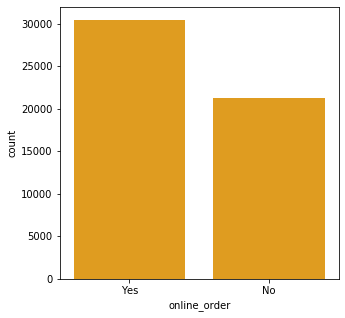

In [50]:
plt.figure(figsize=(5,5))
sns.countplot(data['online_order'],color='orange')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 <a list of 30 Text xticklabel objects>)

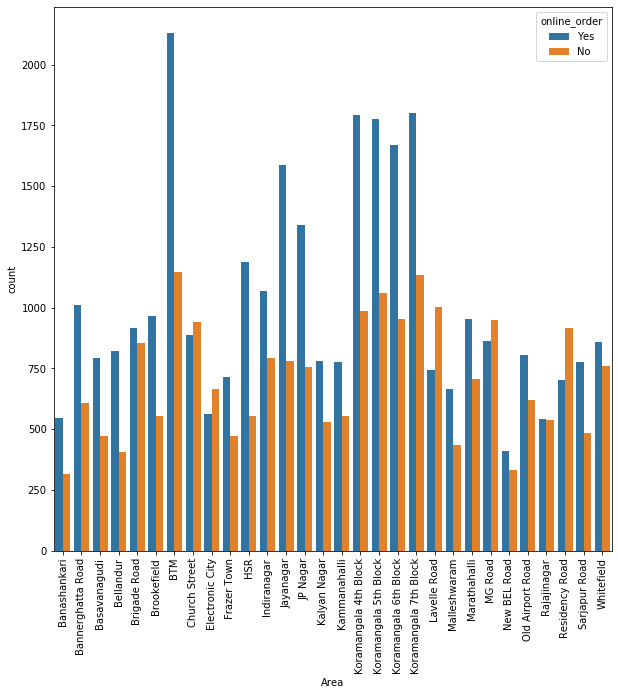

In [51]:
plt.figure(figsize=(10,10))
sns.countplot(data['Area'],hue=data['online_order'])
plt.xticks(rotation=90)

In [84]:
data['rate'].value_counts().index=='NEW'

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [53]:
data.rate.describe()

count     43942
unique       64
top         NEW
freq       2208
Name: rate, dtype: object

In [64]:
data['rate'].value_counts()[data['rate'].value_counts=='NEW']

2208

In [85]:
new_rate=data['rate'].value_counts()[data['rate'].value_counts().index=='NEW']
#df['language'].isin(df['language'].value_counts()[df['language'].value_counts()==1].index)
print(type(new_rate))

<class 'pandas.core.series.Series'>


In [86]:
new_rate.value_counts()

2208    1
Name: rate, dtype: int64

In [87]:
def new_rate_alter(value):
    if value in new_rate:
        return '1.0'
    else:
        return value

In [88]:
data['rate']=data['rate'].apply(new_rate_alter)

In [91]:
data.rate.value_counts(normalize=True).astype(float)

1.0     0.050248
3.9     0.047745
3.8     0.046015
3.7     0.045765
3.9     0.042647
          ...   
2.0     0.000159
2.2     0.000159
2.0     0.000091
1.8     0.000068
1.8     0.000046
Name: rate, Length: 64, dtype: float64

In [95]:
data.rate.value_counts().index=='-'

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False])

In [99]:
rate_char=data['rate'].value_counts()[data['rate'].value_counts().index=='-']
#new_rate=data['rate'].value_counts()[data['rate'].value_counts().index=='NEW']

In [102]:
def char_rate_alter(value):
    if value in rate_char:
        return '0.0'
    else:
        return value

In [103]:
data['rate']=data['rate'].apply(char_rate_alter)

In [104]:
data.rate.astype(float)

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: float64

In [108]:
data.rate.value_counts(ascending=True)

1.8        2
1.8        3
2.0        4
2.2        7
2.0        7
        ... 
3.9     1874
3.7     2011
3.8     2022
3.9     2098
1.0     2208
Name: rate, Length: 64, dtype: int64

In [109]:
data.rate.str.strip(' ')

0        4.1
1        4.1
2        3.8
3        3.7
4        3.8
        ... 
51712    3.6
51713    NaN
51714    NaN
51715    4.3
51716    3.4
Name: rate, Length: 51717, dtype: object

In [111]:
data['rate'].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', '1.0', '2.9', '3.', nan,
       '2.6', '3.8 ', '3.4', '4.', '2.', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', 0.0, '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)